In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

/var/folders/15/5zwsxkxn0pj849cl90lydwth0000gn/T/ipykernel_84389/2441402597.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  tp_small['Date'] = pd.to_datetime(tp_small['Date'])
/var/folders/15/5zwsxkxn0pj849cl90lydwth0000gn/T/ipykernel_84389/2441402597.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  tp_small_vegetated['Date'] = pd.to_datetime(tp_small_vegetated['Date'])


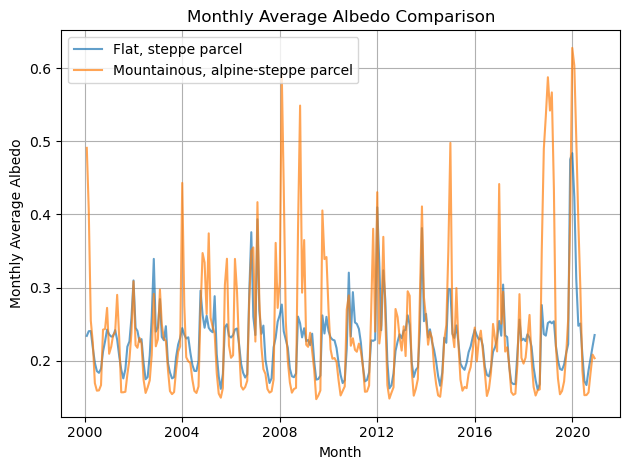

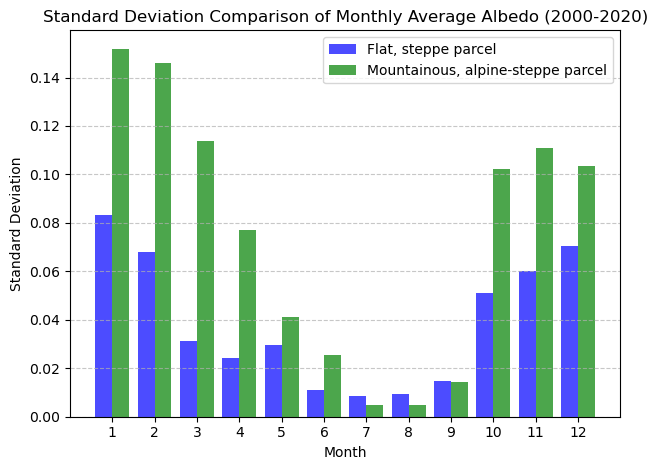

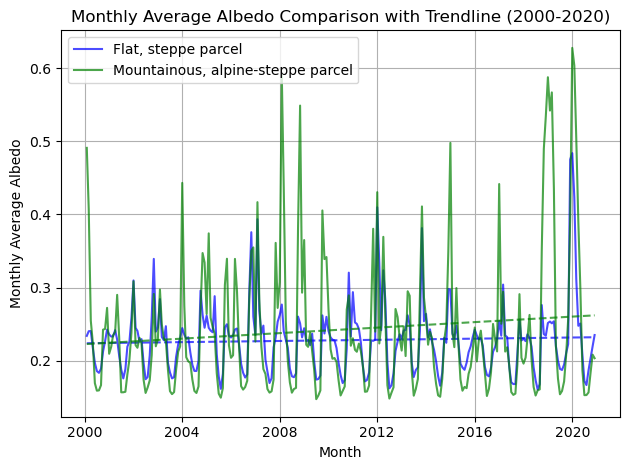

In [7]:
# Read
tp_small = pd.read_csv('/Users/luyou/Downloads/EAS 3050 Final Project/2000-2020-statistics-nonvegetated.csv')
tp_small_vegetated = pd.read_csv('/Users/luyou/Downloads/EAS 3050 Final Project/2000-2020-statistics-vegetated.csv')

# Ensure both datasets have 'Date' in datetime format
tp_small['Date'] = pd.to_datetime(tp_small['Date'])
tp_small_vegetated['Date'] = pd.to_datetime(tp_small_vegetated['Date'])

def process_and_plot_monthly_comparison(data1, data2, title1, title2, main_title):
    """
    Process the data to compute monthly aggregation and plot side-by-side comparisons.
    """
    # Compute monthly aggregates for both datasets
    data1['Date'] = pd.to_datetime(data1['Date'])
    data2['Date'] = pd.to_datetime(data2['Date'])
    
    data1['Month'] = data1['Date'].dt.to_period('M')
    data2['Month'] = data2['Date'].dt.to_period('M')
    
    monthly_aggregate1 = data1.groupby('Month')['Mean'].mean().reset_index()
    monthly_aggregate2 = data2.groupby('Month')['Mean'].mean().reset_index()
    
    monthly_aggregate1['Month'] = monthly_aggregate1['Month'].dt.to_timestamp()
    monthly_aggregate2['Month'] = monthly_aggregate2['Month'].dt.to_timestamp()
    
    # Plot side-by-side comparisons
    plt.figure()
    plt.plot(monthly_aggregate1["Month"], monthly_aggregate1["Mean"], label=title1, alpha=0.7)
    plt.plot(monthly_aggregate2["Month"], monthly_aggregate2["Mean"], label=title2, alpha=0.7)
    plt.xlabel("Month")
    plt.ylabel("Monthly Average Albedo")
    plt.title(main_title)
    plt.grid()
    plt.legend()
    plt.tight_layout()
    plt.show()

def calculate_and_plot_sd_comparison(data1, data2, title1, title2, main_title):
    """
    Calculate the standard deviation for each month for both datasets and plot comparisons.
    """
    data1['MonthOnly'] = data1['Date'].dt.month
    data2['MonthOnly'] = data2['Date'].dt.month
    
    sd1 = data1.groupby('MonthOnly')['Mean'].std().reset_index()
    sd2 = data2.groupby('MonthOnly')['Mean'].std().reset_index()
    
    sd1.columns = ['Month', 'SD']
    sd2.columns = ['Month', 'SD']
    
    # Plot side-by-side comparisons
    plt.figure()
    plt.bar(sd1['Month'] - 0.2, sd1['SD'], width=0.4, label=title1, alpha=0.7, color='blue')
    plt.bar(sd2['Month'] + 0.2, sd2['SD'], width=0.4, label=title2, alpha=0.7, color='green')
    plt.xlabel('Month')
    plt.ylabel('Standard Deviation')
    plt.title(main_title)
    plt.xticks(sd1['Month'], [f'{m}' for m in sd1['Month']])
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()
    plt.show()

def process_and_plot_monthly_comparison_with_trendline(data1, data2, title1, title2, main_title):
    """
    Process the data to compute monthly aggregation and plot side-by-side comparisons with linear trendlines.
    """
    
    # Compute monthly aggregates for both datasets
    data1['Date'] = pd.to_datetime(data1['Date'])
    data2['Date'] = pd.to_datetime(data2['Date'])
    
    data1['Month'] = data1['Date'].dt.to_period('M')
    data2['Month'] = data2['Date'].dt.to_period('M')
    
    monthly_aggregate1 = data1.groupby('Month')['Mean'].mean().reset_index()
    monthly_aggregate2 = data2.groupby('Month')['Mean'].mean().reset_index()
    
    monthly_aggregate1['Month'] = monthly_aggregate1['Month'].dt.to_timestamp()
    monthly_aggregate2['Month'] = monthly_aggregate2['Month'].dt.to_timestamp()
    
    # Plot side-by-side comparisons with trendlines
    plt.figure()
    
    # Plot data1
    plt.plot(monthly_aggregate1["Month"], monthly_aggregate1["Mean"], label=title1, alpha=0.7, color='blue')
    z1 = np.polyfit(range(len(monthly_aggregate1["Month"])), monthly_aggregate1["Mean"], 1)
    p1 = np.poly1d(z1)
    plt.plot(monthly_aggregate1["Month"], p1(range(len(monthly_aggregate1["Month"]))), linestyle='--', color='blue', alpha=0.7)
    
    # Plot data2
    plt.plot(monthly_aggregate2["Month"], monthly_aggregate2["Mean"], label=title2, alpha=0.7, color='green')
    z2 = np.polyfit(range(len(monthly_aggregate2["Month"])), monthly_aggregate2["Mean"], 1)
    p2 = np.poly1d(z2)
    plt.plot(monthly_aggregate2["Month"], p2(range(len(monthly_aggregate2["Month"]))), linestyle='--', color='green', alpha=0.7)
    
    # Configure plot
    plt.xlabel("Month")
    plt.ylabel("Monthly Average Albedo")
    plt.title(main_title)
    plt.grid()
    plt.legend()
    plt.tight_layout()
    plt.show()


# Run side-by-side comparisons for all metrics
process_and_plot_monthly_comparison(
    tp_small, tp_small_vegetated,
    "Flat, steppe parcel", "Mountainous, alpine-steppe parcel",
    "Monthly Average Albedo Comparison"
)

calculate_and_plot_sd_comparison(
    tp_small, tp_small_vegetated,
    "Flat, steppe parcel", "Mountainous, alpine-steppe parcel",
    "Standard Deviation Comparison of Monthly Average Albedo (2000-2020)"
)

process_and_plot_monthly_comparison_with_trendline(
    tp_small, tp_small_vegetated,
    "Flat, steppe parcel", "Mountainous, alpine-steppe parcel",
    "Monthly Average Albedo Comparison with Trendline (2000-2020)"
)